In [221]:
import numpy as np 
import pandas as pd 
import pandas_profiling as pp
import matplotlib.pyplot as plt
import pandas_profiling
from IPython.core.display import Image, display
# for the notebook only (not for JupyterLab) run this command once per session
# libraries
import os
import math
%matplotlib inline
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', None)
from ipywidgets import interact, interactive, interact_manual
import ipywidgets as widgets
import colorlover as cl
from IPython.display import HTML

In [222]:
# Importing datasets
df_multi = pd.read_csv('./multipleChoiceResponses.csv', low_memory=False, header=[0,1]) 
df_others = pd.read_csv('./allExceptUSA.csv', low_memory=False, header=[0,1])  
df_usa = pd.read_csv('./MultiForUSA.csv', low_memory=False, header=[0,1])
df_free = pd.read_csv('./freeFormResponses.csv', low_memory=False, header=[0,1])
# schema = pd.read_csv('./SurveySchema.csv', low_memory=False, header=[0,1])

# Format Dataframes
df_multi.columns = ['_'.join(col) for col in df_multi.columns]
df_others.columns = ['_'.join(col) for col in df_others.columns]
df_usa.columns = ['_'.join(col) for col in df_usa.columns]
df_free.columns = ['_'.join(col) for col in df_free.columns]
# schema.columns = ['_'.join(col) for col in schema.columns]

# For getting all columns
pd.set_option('display.max_columns', None)

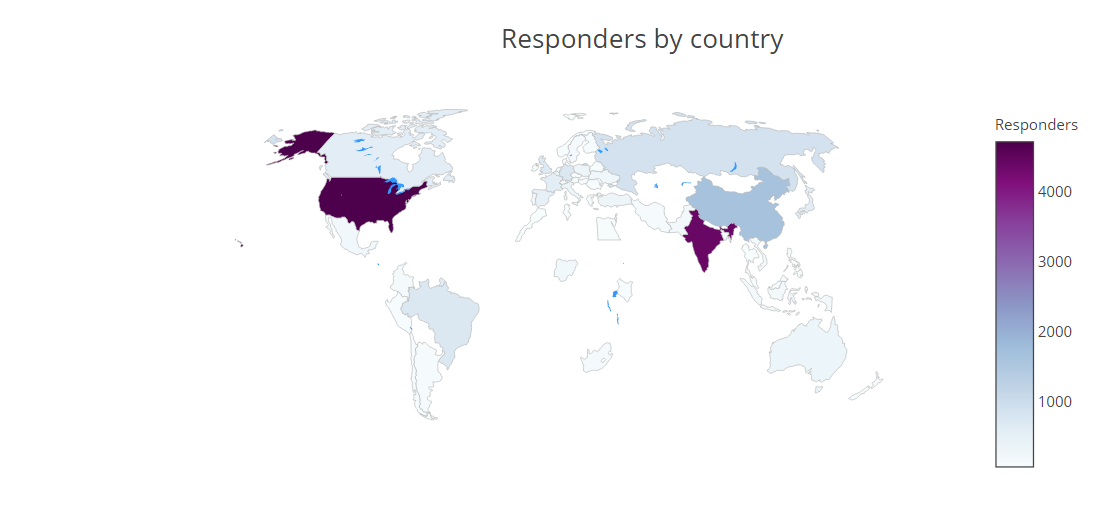

In [223]:
# Image is generated using https://plot.ly/create/
display(Image("./RespondersByCountry.png", width=900, unconfined=True))

# The goal of this project is to answer the research question Which are the most valued data science skills, programming tools,
# languages to improve students' curriculum.
# As the most of responders are from the USA (the world leader of DS and country where DS had become popular earlier than in 
# other countries) and India, the graphics below depicts data separately about USA and Other countris of the world


In [224]:
# After analyzing data, variables:GenderSelect & Age, it appears that out of 23860 global Kaggle respondents there are around 
# 19500 males and 4500 females. In this subset male respondents are almost 5 (~4.5) times more than female respondents.
#     Also, from the plot below it is pretty evident that repondents’ age peaks at 25 for males and at 22 females whereas the 
#     median age is about 30.
data = []
for i in df_others['Q1_What is your gender? - Selected Choice'].unique():
   
    trace = go.Bar(
        x=df_choice.loc[df_choice['Q1_What is your gender? - Selected Choice'] == i, 'Q2_What is your age (# years)?'].value_counts().sort_index().index,
        y=df_choice.loc[df_choice['Q1_What is your gender? - Selected Choice'] == i, 'Q2_What is your age (# years)?'].value_counts().sort_index().values,
        name=i
    )
    data.append(trace)
layout = go.Layout(
    barmode='relative'
)
fig = go.Figure(data=data, layout=layout)
fig['layout'].update(title='Responders distribution by age and gender between all responders');
iplot(fig, filename='stacked-bar')

In [225]:
# The distribution table of formal education between males and femails depicts that most of responders has a masters's degree
# for both female and male. The tendency is the the same in the USA and Other countries
s = pd.crosstab(df_usa['Q1_What is your gender? - Selected Choice'],
                df_usa['Q4_What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'], normalize='index').style.background_gradient(cmap='viridis', low=.05, high=0).highlight_null('red')
s



Q4_What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Bachelor’s degree,Doctoral degree,I prefer not to answer,Master’s degree,No formal education past high school,Professional degree,Some college/university study without earning a bachelor’s degree
Q1_What is your gender? - Selected Choice,,,,,,,
Female,0.243017,0.163873,0.00465549,0.555866,0,0.00558659,0.0270019
Male,0.274083,0.191227,0.00286697,0.47219,0.00258028,0.0108945,0.0461583
Prefer not to say,0.216216,0.175676,0.0675676,0.445946,0.0675676,0.0135135,0.0135135
Prefer to self-describe,0.346154,0.0769231,0.0769231,0.5,0,0,0


In [226]:
s = pd.crosstab(df_choice['Q1_What is your gender? - Selected Choice'],
                df_choice['Q4_What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'], normalize='index').style.background_gradient(cmap='viridis', low=.05, high=0).highlight_null('red')
s

Q4_What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Bachelor’s degree,Doctoral degree,I prefer not to answer,Master’s degree,No formal education past high school,Professional degree,Some college/university study without earning a bachelor’s degree
Q1_What is your gender? - Selected Choice,,,,,,,
Female,0.257232,0.156849,0.0142907,0.507842,0.00557686,0.029627,0.0285814
Male,0.322397,0.127908,0.0153156,0.449087,0.0121115,0.0295418,0.0436399
Prefer not to say,0.24,0.168,0.152,0.324,0.04,0.028,0.048
Prefer to self-describe,0.230769,0.211538,0.0961538,0.365385,0.0576923,0.0192308,0.0192308


In [227]:
# We can see below, that majority responders position in the USA are Data Scientists and almost at the same level students.
# While for other countries students keep the leadership. This can be caused by the fact, that Data Science became popular and deeply
# developed earlier, than in OTher countries, and most of responders are professional Data Scientists while in Other countries
# its students studing DS
countsDf = df_usa['Q6_Select the title most similar to your current role (or most recent title if retired): - Selected Choice'].value_counts()
trace1 = go.Bar(
                x = countsDf.index,
                y = countsDf.values,
                name = "Kaggle",
                marker = dict(color = 'orangered'),
                text = countsDf.index)
data = [trace1]
layout = go.Layout(barmode = "group",title='Job Position USA', yaxis= dict(title='Counts'),showlegend=False, height=600)

fig = go.Figure(data = data, layout = layout)
fig['layout'].update(margin=go.layout.Margin(
        l=150,
        r=150,
        b=200,
        t=200,
        pad=4
    ))
iplot(fig)




In [228]:
countsDf = df_others['Q6_Select the title most similar to your current role (or most recent title if retired): - Selected Choice'].value_counts()
trace1 = go.Bar(
                x = countsDf.index,
                y = countsDf.values,
                name = "Kaggle",
                marker = dict(color = 'orangered'),
                text = countsDf.index)
data = [trace1]
layout = go.Layout(barmode = "group",title='Job Position Others', yaxis= dict(title='Counts'),showlegend=False, height=600)

fig = go.Figure(data = data, layout = layout)
fig['layout'].update(margin=go.layout.Margin(
        l=150,
        r=150,
        b=200,
        t=200,
        pad=4
    ))
iplot(fig)

In [229]:
# We can see the number of responders using machine learning during their working or studying processee on the crosstable below
# The huge majority of them are are used at the universities, IT companies and in the student's researches
s = pd.crosstab(df_usa['Q7_In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice'],
                df_usa['Q10_Does your current employer incorporate machine learning methods into their business?']).style.background_gradient(cmap='summer', low=.5, high=0.9).highlight_null('red')
s

Q10_Does your current employer incorporate machine learning methods into their business?,I do not know,No (we do not use ML methods),We are exploring ML methods (and may one day put a model into production),"We have well established ML methods (i.e., models in production for more than 2 years)","We recently started using ML methods (i.e., models in production for less than 2 years)",We use ML methods for generating insights (but do not put working models into production)
Q7_In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice,,,,,,
Academics/Education,53,150,108,53,65,94
Accounting/Finance,16,38,76,59,54,30
Broadcasting/Communications,5,14,13,9,22,8
Computers/Technology,60,125,156,331,157,77
Energy/Mining,5,15,20,9,30,10
Government/Public Service,10,42,29,29,26,21
Hospitality/Entertainment/Sports,4,16,8,13,14,11
I am a student,284,128,104,45,57,63
Insurance/Risk Assessment,7,21,26,45,39,21


In [230]:
s = pd.crosstab(df_others['Q7_In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice'],
                df_others['Q10_Does your current employer incorporate machine learning methods into their business?']).style.background_gradient(cmap='summer', low=.5, high=0.9).highlight_null('red')
s

Q10_Does your current employer incorporate machine learning methods into their business?,I do not know,No (we do not use ML methods),We are exploring ML methods (and may one day put a model into production),"We have well established ML methods (i.e., models in production for more than 2 years)","We recently started using ML methods (i.e., models in production for less than 2 years)",We use ML methods for generating insights (but do not put working models into production)
Q7_In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice,,,,,,
Academics/Education,216,522,573,206,262,275
Accounting/Finance,50,235,287,170,265,116
Broadcasting/Communications,14,62,69,44,82,25
Computers/Technology,291,896,1131,728,1020,423
Energy/Mining,14,81,95,32,89,41
Government/Public Service,23,161,137,31,60,52
Hospitality/Entertainment/Sports,2,41,17,8,19,17
I am a student,1578,588,663,150,331,231
Insurance/Risk Assessment,13,74,98,54,114,40


In [231]:
# Function for building a bar chart from a column of data
def plot_sample_bar(var='', title_name='', dataset=df_others, color='silver'):
    col_names = [col for col in dataset.columns if f'{var}_Part' in col]
    data = []
    small_df = dataset[col_names]
    text_values = [col.split('- ')[2] for col in col_names]
    counts = []
    for m, n in zip(col_names, text_values):
        if small_df[m].nunique() == 0:
            counts.append(0)
        else:
            counts.append(sum(small_df[m] == n))
    trace = go.Bar(
        x=text_values,
        y=counts,
        marker=dict(color=color),
        showlegend=False
    )
    data.append(trace)    
    fig = go.Figure(data=data)
    fig['layout'].update(height=600, width=800, title=f'Popular {title_name}');
    return fig

# Function for building a pie chart from a column of data
def plot_sample_pie(q='', title='', dataset=df_others):
    col_name = [col for col in df_free.columns if q in col][0]
    df_ = df_free[col_name].value_counts().head(7)
    trace = go.Pie(labels=df_.index, 
                   values=df_.values
                  )

    data = [trace]
    layout = go.Layout(
        title=title
    )

    fig = go.Figure(data=data, layout=layout)
    return fig

In [232]:
# On the histogramme below we can see, that Python and R are recommened as the best programming language  for DS researches. 
# It proves, that Python today is the most popular programming language in the world. 

countsDf = df_usa['Q18_What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice'].value_counts()
trace1 = go.Bar(
                x = countsDf.index,
                y = countsDf.values,
                name = "Languages",
                marker = dict(color = 'Purple '),
                text = countsDf.index)
data = [trace1]
layout = go.Layout(barmode = "group",title='Recomended by USA responders Programming languages for DS', yaxis= dict(title='Counts'),showlegend=False, height=600)

fig = go.Figure(data = data, layout = layout)
fig['layout'].update(margin=go.layout.Margin(
        l=150,
        r=150,
        b=200,
        t=200,
        pad=4
    ))
iplot(fig)



In [233]:
countsDf = df_others['Q18_What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice'].value_counts()
trace1 = go.Bar(
                x = countsDf.index,
                y = countsDf.values,
                name = "Languages",
                marker = dict(color = 'Purple '),
                text = countsDf.index)
data = [trace1]
layout = go.Layout(barmode = "group",title='Recomended by Other countries responders Programming languages ', yaxis= dict(title='Counts'),showlegend=False, height=600)

fig = go.Figure(data = data, layout = layout)
fig['layout'].update(margin=go.layout.Margin(
        l=150,
        r=150,
        b=200,
        t=200,
        pad=4
    ))
iplot(fig)

In [234]:
# Medium Blog Posts and Kaggle forums are the most popular resourses attended in the USA and in the world
# https://fivethirtyeight.com is very popular in the USA, at the same time it is almost unknown in other countries
fig = plot_sample_bar(var='Q38', title_name='resources USA', dataset=df_usa, color='Olive')
iplot(fig);

In [235]:
fig = plot_sample_bar(var='Q38', title_name='resources Other countries',color='Olive')
iplot(fig);

In [236]:
#  At the same time Open Data Science resourse is popular for over 45% of responders. (ods.ai - community of Russian Data Scientists)
fig = plot_sample_pie('Q38', title='Other Popular Resources between all responders', dataset=df_choice)
iplot(fig)

In [237]:
# Most popular IDE is Jupyter Notebooks. Well, obviously it is one of the best tools for fast EDA and modelling in Python
# RStudio is quite popular in USA - so lots of R-DS there. It's interesting to see that Notepad++ is still widely used
#  in the USA and other countries of the world

fig = plot_sample_bar(var='Q13', title_name='IDE USA', dataset=df_usa, color='Navy')
iplot(fig);

In [238]:
fig = plot_sample_bar(var='Q13', title_name='IDE Other countries', color='Navy')
iplot(fig);

In [239]:
# Amazon is twice as popular than Google cloud platform in the USA, while in orther countries the diffirence is not so large
fig = plot_sample_bar(var='Q15', title_name='Cloud computing services USA', dataset=df_usa, color='Aqua')
iplot(fig);

In [240]:
fig = plot_sample_bar(var='Q15', title_name='Cloud computing services Other Countries', color='Aqua')
iplot(fig);

In [241]:
#  Pythoon is the leader and on this graph. It's the basic programming language for students and researches who are the main 
#  responders of this servey. And of course Python is used IN DS, counting, analizing, visualizing. SQL and R are on the 
# second and the third places respectively Thw same tendency is kept for USA and other countries
fig = plot_sample_bar(var='Q16', title_name='Programming languages USA', dataset=df_usa, color='Chartreuse')
iplot(fig);

In [242]:
fig = plot_sample_bar(var='Q16', title_name='Programming languages regular usage in Other Countries', color='Chartreuse')
iplot(fig);

In [243]:
fig = plot_sample_pie('Q16', title='Other popular programming languages in the World', dataset=df_choice)
iplot(fig)

In [244]:
# Scikit-Learn, TensorFlow, Keras are the most popular ML frameworks used by Kaggle responders
fig = plot_sample_bar(var='Q19', title_name='ML frameworks USA', dataset=df_usa, color='DarkViolet')
iplot(fig);

In [245]:
fig = plot_sample_bar(var='Q19', title_name='ML frameworks Other Countries', color='DarkViolet')
iplot(fig);

In [246]:
#  The most popular visualising library is matplotlib. While Altair is used very seldom. This can be caused, that library 
# appeared just two years ago and isn't very popular yet
fig = plot_sample_bar(var='Q21', title_name='Data visualization libraries USA', color='Green')
iplot(fig);

In [247]:
fig = plot_sample_bar(var='Q21', title_name='Data visualization libraries Other Countries', color='Green')
iplot(fig);

In [248]:
#  MySQL is the most widely used, while Postgress, Microsoft SQL and SQLLite are also very popular data bases
fig = plot_sample_bar(var='Q29', title_name='Data bases USA', dataset=df_usa, color='Indigo')
iplot(fig);

In [249]:
fig = plot_sample_bar(var='Q29', title_name='Data bases Other Countries', color='Indigo')
iplot(fig);

In [250]:
fig = plot_sample_pie('Q29', title='Other Popular databases between all responders')
iplot(fig)

In [251]:
# Coursera is a market leader in online education courses. There you can find courses on almost any topic and level. 
# An important factor is that you can apply for financial assistance and take courses for free. 
# Udacity, Udemy and edX are less popular, but nevertheless, you can also find a large number of interesting courses on them.
fig = plot_sample_bar(var='Q36', title_name='online platforms USA', dataset=df_usa, color='LightSeaGreen')
iplot(fig);

In [252]:
fig = plot_sample_bar(var='Q36', title_name='online platforms Other Countries', color='LightSeaGreen')
iplot(fig);

In [253]:
fig = plot_sample_bar(var='Q36', title_name='Platforms where responders begun/completed data science courses USA', dataset=df_usa, color='Lime')
iplot(fig);

In [254]:
fig = plot_sample_bar(var='Q36', title_name='Online platforms where responders begun/completed data science courses Other Countries', color='Lime')
iplot(fig);

In [255]:
# It might be interesting to see the crosstable dependency of programming language and year salary of Kaggle responders
s = pd.crosstab(df_choice['Q17_What specific programming language do you use most often? - Selected Choice'],
                df_choice['Q9_What is your current yearly compensation (approximate $USD)?'], normalize='index').style.background_gradient(cmap='viridis', low=.5, high=0).highlight_null('red')
s

Q9_What is your current yearly compensation (approximate $USD)?,"0-10,000","10-20,000","100-125,000","125-150,000","150-200,000","20-30,000","200-250,000","250-300,000","30-40,000","300-400,000","40-50,000","400-500,000","50-60,000","500,000+","60-70,000","70-80,000","80-90,000","90-100,000",I do not wish to disclose my approximate yearly compensation
Q17_What specific programming language do you use most often? - Selected Choice,,,,,,,,,,,,,,,,,,,
Bash,0.146341,0.195122,0.0487805,0,0.0243902,0.0487805,0,0,0.0243902,0,0.0731707,0,0.0731707,0,0.0243902,0.0243902,0.0731707,0.0243902,0.219512
C#/.NET,0.219298,0.131579,0.0146199,0.0292398,0.00877193,0.0789474,0,0,0.0730994,0,0.0409357,0,0.0614035,0,0.0467836,0.0292398,0.0175439,0.0263158,0.222222
C/C++,0.306507,0.0890411,0.0119863,0.00513699,0.00684932,0.0616438,0,0.00342466,0.0530822,0,0.0291096,0,0.0410959,0.00171233,0.015411,0.0256849,0.0136986,0.015411,0.320205
Go,0.075,0.025,0.05,0.075,0.075,0.15,0,0,0.1,0,0.1,0,0.025,0,0.05,0.05,0,0.025,0.2
Java,0.260294,0.114706,0.0279412,0.0117647,0.0147059,0.0867647,0.00147059,0,0.0647059,0,0.0529412,0.00294118,0.0441176,0,0.0308824,0.0220588,0.0102941,0.0132353,0.241176
Javascript/Typescript,0.26087,0.145963,0.0248447,0.0217391,0.00621118,0.0745342,0,0,0.0590062,0,0.0652174,0,0.0403727,0,0.0403727,0.0186335,0.0124224,0.0217391,0.208075
Julia,0,0.285714,0,0,0,0,0,0,0.285714,0,0.142857,0,0,0,0,0,0,0,0.285714
MATLAB,0.307393,0.14786,0.0194553,0.00389105,0,0.0622568,0.0077821,0,0.0466926,0,0.0544747,0,0.0350195,0,0.0155642,0.0194553,0.00389105,0.0194553,0.256809
Other,0.155556,0.1,0.0333333,0,0.0333333,0.133333,0.0222222,0,0.0444444,0,0.1,0,0.0777778,0.0111111,0.0333333,0.0444444,0.0111111,0.0222222,0.177778


In [256]:
#  CONCLUSION
#     Based on the analysis above, we can surely recommend R language as one of the most popular and vital courses for Data Scientists.
# We can see that the majority of Kaggle responders use it at the universities, IT companies, research fields, in business.
# R language is recommended as the second important language after Python. R/machine learning, Rblogers are the resources,
# very often visited by Kaggle responders. By the way, R Language is supported as the second the most important language after 
# the Python. RStudio and R are the leaders in the usage by responders in the USA and other countries of the world. There are many 
# courses of R on the most popular world online platforms (Coursera, Udemy, edX, etc.). Analyzing the crosstable of salary and 
# programming language, we can see that there are people using R, who earns over 500000$ per year.
#    R Language:
# 1. Introduction to basics
#    - How it works
#    - Introduction to R Studio
#    - Arithmetic with R
#    - Variable assignment
#    - Basic data types in R
# 2. Functions
#    - Introduction
#    - Functions Are for Humans and Computers
#    - Conditional Execution
#    - Function Arguments
#    - Return Values
# 3. Data Visualization with ggplot2
#     - Facets 
#     - Geometric Objects 
#     - Statistical Transformations
#     - The Layered Grammar of Graphics 
# 4. Vectors 
#    - Vector Basics
#    - Using Atomic Vectors
#    - Recursive Vectors
#    - Augmented Vectors
# 5. Model
#    - Model Basics with modelr
#    - A Simple Model 
#    - Visualizing Models 
#    - Formulas and Model Families 
